# Model Training

In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
from scipy.fftpack import fft, fftfreq

in this notebook, will be doing preprocessing then training of a preliminary model.

notes for myself: how should it go?

    center data, normalize, fft, pca -> model
    center data, fft, pca -> model
    center data, normalize, fft -> model
    center data, normalize, fft, zero padding -> model

1d cnn for pixel by pixel,
2d cnn for spatial relationships,
could also use random forest/svm,
mlp


In [2]:
data_dir = "/Users/kelseypenners/Library/CloudStorage/OneDrive-TUEindhoven/Li, Muyao's files - 5ARIP10 shared data/Experimental Data/composite plate"
files = os.listdir(data_dir)


npy_path = os.path.join(data_dir, files[0])
exp_data = np.load(npy_path)
print("composite plate npy shape: ", exp_data.shape)
t = np.linspace(0.5, 1443*0.5, 1443) # The data was extracted at a frequency of 2Hz. Thus, for 1324 frames, the duration of this experiment is 1324*0.5s

composite plate npy shape:  (1442, 307200)


## Preprocessing

In [3]:
def apply_fft(data, t):
    # compute fast fourier transform
    fft_result = fft(data, axis=0)

    # compute frequencies
    freq = fftfreq(len(t), d=(t[1]-t[0]))

    return fft_result, freq

### Frequency Domain Analysis

In [4]:
# center data
exp_data -= np.mean(exp_data, axis=0)

In [5]:
# apply fft
fft_results, freq = apply_fft(exp_data, t)

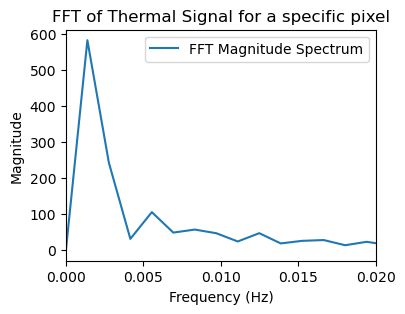

In [6]:
# plot fft magnitude spectrum for a specific pixel
pixel_id = np.random.choice(307200, 1)
p_fft = fft_results[:, pixel_id]

plt.figure(figsize=(4, 3))
plt.plot(np.abs(freq[:700]), np.abs(p_fft[:700]), label="FFT Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Thermal Signal for a specific pixel")
plt.xlim(0,0.02)
plt.legend()
plt.show()

now could add zero padding, find peak locations and magnitude, normalize the spectrums, filter out noise, etc, etc

582.0641767379415
1


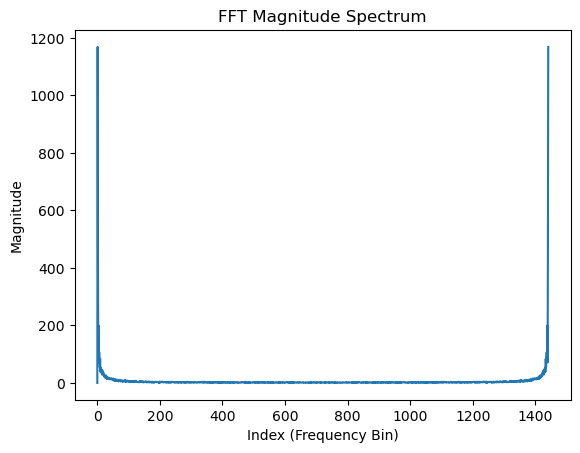

In [7]:
print(np.max(np.abs(p_fft)))
print(np.argmax(np.abs(p_fft)))

def find_peaks(data):
    return "ya mama"

pixel_id = np.random.choice(307200, 1)
p_fft = fft_results[:, pixel_id]

plt.plot(np.abs(p_fft))
plt.title("FFT Magnitude Spectrum")
plt.xlabel("Index (Frequency Bin)")
plt.ylabel("Magnitude")

plt.show()

### Zero Padding Frequency Domain Analysis

In [8]:
# add zero padding
padded_data = np.pad(exp_data, ((0, 2048 - exp_data.shape[0]), (0,0)))
print(padded_data.shape) 
padded_t = np.linspace(0.5, 2048*0.5, 2048)

(2048, 307200)


In [9]:
# apply fft
fft_padded_results, padded_freq = apply_fft(padded_data, padded_t)

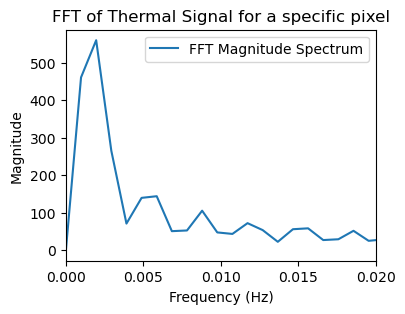

In [10]:
# plot fft magnitude spectrum for a specific pixel
pixel_id = np.random.choice(307200, 1)
p_padded_fft = fft_padded_results[:, pixel_id]

plt.figure(figsize=(4, 3))
plt.plot(np.abs(padded_freq[:700]), np.abs(p_padded_fft[:700]), label="FFT Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Thermal Signal for a specific pixel")
plt.xlim(0,0.02)
plt.legend()
plt.show()

559.8756371100104
2


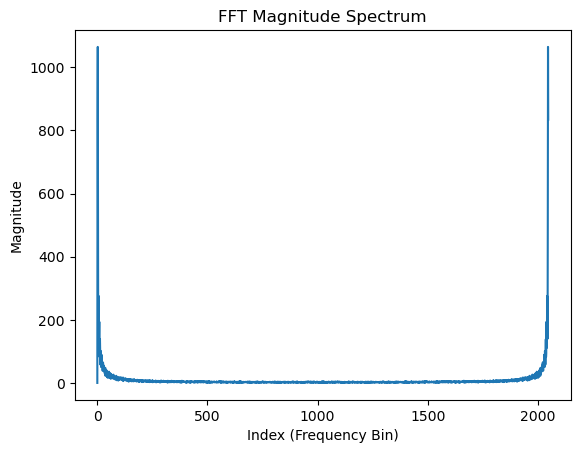

In [11]:
print(np.max(np.abs(p_padded_fft)))
print(np.argmax(np.abs(p_padded_fft)))

def find_peaks(data):
    return "ya mama"

pixel_id = np.random.choice(307200, 1)
p_padded_fft = fft_padded_results[:, pixel_id]

plt.plot(np.abs(p_padded_fft))
plt.title("FFT Magnitude Spectrum")
plt.xlabel("Index (Frequency Bin)")
plt.ylabel("Magnitude")

plt.show()

## Model Implementation & Training